# Session 5 - Spark Introduction

In [ ]:
### Important ###
### Run this cell if you are using Google Colab
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
print('[Done] openjdk8 has been installed')
!wget -q https://downloads.apache.org/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz -C /usr/lib/
!rm spark-2.4.7-bin-hadoop2.7.tgz
print('[Done] Spark has been installed')
!pip install -q findspark
print('[Done] findspark has been installed')
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/usr/lib/spark-2.4.7-bin-hadoop2.7"
print('[Done] Environment variables has been set')
import findspark
findspark.init()
print('[Done] You can use pyspark now.')

[Done] openjdk8 has been installed
[Done] Spark has been installed
[Done] findspark has been installed
[Done] Environment variables has been set
[Done] You can use pyspark now.


In [ ]:
from pyspark import SparkContext

Create the spark context

In [ ]:
sc = SparkContext()

In [ ]:
og_numbers = [0, 1, 2, 3]
og_students = [('Sam', 15), ('Sarah', 17)]

In [ ]:
# Parallelize 
# Convert to RDD

numbers = sc.parallelize(og_numbers)
students = sc.parallelize(og_students)

In [ ]:
# checkin the type
print(type(og_numbers))
print(type(numbers))

<class 'list'>
<class 'pyspark.rdd.RDD'>


In [ ]:
#collect 
numbers.collect()
students.collect() # prints the last one only

[('Sam', 15), ('Sarah', 17)]

In [ ]:
# Take
numbers.take(3)

[0, 1, 2]

In [ ]:
# First
numbers.first()

0

In [ ]:
lines = sc.textFile('words.txt')

In [ ]:
lines.take(3)

["Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.",
 '',
 'Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.']

In [ ]:
# Map
# Split by word

def split_words(sentence):
  return sentence.split(' ')

words = lines.map(split_words)

In [ ]:
words.take(1)

[['Mr.',
  'and',
  'Mrs.',
  'Dursley,',
  'of',
  'number',
  'four,',
  'Privet',
  'Drive,',
  'were',
  'proud',
  'to',
  'say',
  'that',
  'they',
  'were',
  'perfectly',
  'normal,',
  'thank',
  'you',
  'very',
  'much.',
  'They',
  'were',
  'the',
  'last',
  'people',
  "you'd",
  'expect',
  'to',
  'be',
  'involved',
  'in',
  'anything',
  'strange',
  'or',
  'mysterious,',
  'because',
  'they',
  'just',
  "didn't",
  'hold',
  'with',
  'such',
  'nonsense.']]

In [ ]:
flattened = words.flatMap(lambda x: x)  
flattened.take(10)

['Mr.',
 'and',
 'Mrs.',
 'Dursley,',
 'of',
 'number',
 'four,',
 'Privet',
 'Drive,',
 'were']

In [ ]:
word_key = flattened.map(lambda x: (x, 1))
word_key.take(5)

[('Mr.', 1), ('and', 1), ('Mrs.', 1), ('Dursley,', 1), ('of', 1)]

In [ ]:
result = word_key.reduceByKey(lambda accum, curr: accum + curr)
result.take(10)

[('Mr.', 30),
 ('of', 72),
 ('four,', 3),
 ('Privet', 8),
 ('Drive,', 3),
 ('say', 6),
 ('perfectly', 2),
 ('normal,', 2),
 ('very', 17),
 ('much.', 1)]

In [ ]:
# Accum (Shared)

n_of = sc.accumulator(0)

def countIs(val):
  global n_of
  if val == 'of':
    n_of += 1

flattened.foreach(countIs)
print(n_of)

72


# Session 7 - Sql

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.getOrCreate()

spark.sparkContext # just to check version

<SparkContext master=local[*] appName=pyspark-shell>

In [ ]:
# RDD -> Resilient Distributed Dataset

rdd = sc.parallelize([
  {"name" : "William", "age": 20},
  {"name" : "farrel", "age": 20},
  {"name" : "joko", "age": 19}
])

temp = rdd.toDF()

/usr/lib/spark-2.4.7-bin-hadoop2.7/python/pyspark/sql/session.py:366: UserWarning: Using RDD of dict to inferSchema is deprecated. Use pyspark.sql.Row instead
  warnings.warn("Using RDD of dict to inferSchema is deprecated. "


In [ ]:
temp.printSchema()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



In [ ]:
temp.show()

+---+-------+
|age|   name|
+---+-------+
| 20|William|
| 20| farrel|
| 19|   joko|
+---+-------+



In [ ]:
table = spark.read.format("csv").options(header='true', inferschema='true').load('MsCustomer.csv')

table.printSchema()

root
 |-- CustomerId: integer (nullable = true)
 |-- CustomerName: string (nullable = true)
 |-- CustomerPhone: string (nullable = true)
 |-- CustomerEmail: string (nullable = true)



In [ ]:
table.show()

+----------+--------------------+-----------------+--------------------+
|CustomerId|        CustomerName|    CustomerPhone|       CustomerEmail|
+----------+--------------------+-----------------+--------------------+
|         1|         Ky Mossdale| +33 956 967 8883|kmossdale0@eventb...|
|         2|          Elora Camp| +55 872 805 1595|   ecamp1@reddit.com|
|         3|         Lesli Birds| +86 365 657 4802|  lbirds2@oakley.com|
|         4|      Vivianne Lukas| +86 776 874 9691|   vlukas3@alexa.com|
|         5|      Ronny Klaesson|+378 130 669 9961|rklaesson4@smugmu...|
|         6|    Delaney Pawelski| +86 838 788 6960|dpawelski5@weibo.com|
|         7|     Gigi Stonbridge| +86 722 576 4237|gstonbridge6@buzz...|
|         8|  Blondell Chattaway| +57 801 501 4983|bchattaway7@syman...|
|         9|       Edita Valerio|+358 534 896 2773|evalerio8@cafepre...|
|        10|Christalle Langca...| +81 249 342 0991|clangcastle9@colu...|
|        11|        Kristel Dowd| +86 301 164 5672|

In [ ]:
store_locations = spark.read.json('File location.json')

store_locations.printSchema()

In [ ]:
# Query

temp.select("*").show() # show all
temp.select("name").show() # just name

+---+-------+
|age|   name|
+---+-------+
| 20|William|
| 20| farrel|
| 19|   joko|
+---+-------+

+-------+
|   name|
+-------+
|William|
| farrel|
|   joko|
+-------+



In [ ]:
temp.filter(temp['name'] == 'farrel').show() # where condition

+---+------+
|age|  name|
+---+------+
| 20|farrel|
+---+------+



In [ ]:
temp.groupBy('age').count().show()

+---+-----+
|age|count|
+---+-----+
| 19|    1|
| 20|    2|
+---+-----+



In [ ]:
# Sql Version

table.createOrReplaceTempView("MsCustomer") # creating a view so that the main data is not altered

spark.sql(
    """
      SELECT CustomerName, CustomerPhone
      FROM MsCustomer
    """
).show()

+--------------------+-----------------+
|        CustomerName|    CustomerPhone|
+--------------------+-----------------+
|         Ky Mossdale| +33 956 967 8883|
|          Elora Camp| +55 872 805 1595|
|         Lesli Birds| +86 365 657 4802|
|      Vivianne Lukas| +86 776 874 9691|
|      Ronny Klaesson|+378 130 669 9961|
|    Delaney Pawelski| +86 838 788 6960|
|     Gigi Stonbridge| +86 722 576 4237|
|  Blondell Chattaway| +57 801 501 4983|
|       Edita Valerio|+358 534 896 2773|
|Christalle Langca...| +81 249 342 0991|
|        Kristel Dowd| +86 301 164 5672|
|         Odette Hele|+234 372 105 0577|
|          Fern Audus| +81 110 726 9016|
|  Alasdair Wetherill|+976 732 179 9594|
|      Cosetta Jursch|+880 254 254 1604|
|      Lizette Artois|  +7 528 306 0322|
|         Gard Cassar| +63 120 489 7357|
|        Port Giuroni| +86 609 544 7157|
|     Debbie Cockrill|+216 568 753 7031|
|    Jacquelyn Nutten| +62 693 342 7685|
+--------------------+-----------------+
only showing top

# Session 9 - Classifying

In [ ]:
from pyspark.ml.feature import VectorAssembler, StandardScaler, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
df_train = spark.read.csv('Classification_Train.csv', inferSchema=True, header=True)
df_test = spark.read.csv('Classification_Test.csv', inferSchema=True, header=True)

In [ ]:
df_train.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Height: integer (nullable = true)
 |-- Education Level: string (nullable = true)
 |-- Eye Color: string (nullable = true)
 |-- Married: string (nullable = true)
 |-- Salary Income: integer (nullable = true)
 |-- Depressed: string (nullable = true)



In [ ]:
df_train.show()

+-------------------+------+------+---------------+---------+-------+-------------+---------+
|               Name|Gender|Height|Education Level|Eye Color|Married|Salary Income|Depressed|
+-------------------+------+------+---------------+---------+-------+-------------+---------+
|      Sax Tesseyman|Female|   174|   Intermediate|     Blue|    Yes|     85000000|       No|
|        Niels Greet|  Male|   165|   Intermediate|    Black|     No|     14000000|       No|
|     Minetta Santry|Female|   160|            Low|    Black|     No|    148000000|      Yes|
|     Sherm Gossipin|Female|   144|           High|    Black|     No|     50000000|      Yes|
|   Cathie Blackmuir|  Male|   168|   Intermediate|    Black|    Yes|    101000000|       No|
|     Early Cardenas|  Male|   151|            Low|    Black|    Yes|    145000000|      Yes|
|   Willard Pendrick|Female|   141|   Intermediate|    Brown|     No|     55000000|      Yes|
|   Penelopa Spensly|Female|   144|   Intermediate|     Blue

In [ ]:
# Selecting important features

chosen_columns = ['Education Level', 'Married', 'Salary Income', 'Depressed']

In [ ]:
df_train = df_train.select(chosen_columns)
df_test = df_test.select(chosen_columns)

In [ ]:
df_train.show()
df_test.show()

+---------------+-------+-------------+---------+
|Education Level|Married|Salary Income|Depressed|
+---------------+-------+-------------+---------+
|   Intermediate|    Yes|     85000000|       No|
|   Intermediate|     No|     14000000|       No|
|            Low|     No|    148000000|      Yes|
|           High|     No|     50000000|      Yes|
|   Intermediate|    Yes|    101000000|       No|
|            Low|    Yes|    145000000|      Yes|
|   Intermediate|     No|     55000000|      Yes|
|   Intermediate|    Yes|     51000000|       No|
|           High|     No|     97000000|      Yes|
|            Low|     No|     41000000|      Yes|
|           High|    Yes|     27000000|       No|
|           High|    Yes|      3000000|       No|
|           High|     No|      9000000|      Yes|
|   Intermediate|     No|     12000000|      Yes|
|   Intermediate|    Yes|     81000000|       No|
|           High|     No|     53000000|      Yes|
|            Low|     No|     10000000|      Yes|


In [ ]:
# Data Preprocessing
# Drop null

print(f'Train df count: {df_train.count()}') # counting the amount of data
print(f'Test df count: {df_test.count()}')

Train df count: 10000
Test df count: 2000


In [ ]:
df_train = df_train.dropna() # dropping null or empty data
df_test = df_test.dropna()

In [ ]:
print(f'Train df count: {df_train.count()}')
print(f'Test df count: {df_test.count()}')

Train df count: 10000
Test df count: 2000


In [ ]:
# Transform Data

# Indexing String
def encode_column(column_name: str):
  global df_train, df_test

  indexer = StringIndexer(
      inputCol = column_name,
      outputCol = 'generated')
  
  # Catat
  indexer = indexer.fit(df_train) # fit sekali aja 
  # Ubah
  df_train = indexer.transform(df_train)
  df_train = df_train.drop(column_name)
  df_train = df_train.withColumnRenamed('generated', column_name)
  # Ubah
  df_test = indexer.transform(df_test)
  df_test = df_test.drop(column_name)
  df_test = df_test.withColumnRenamed('generated', column_name)

In [ ]:
encode_column('Education Level')
encode_column('Depressed')
encode_column('Married')

In [ ]:
df_train.show()

+-------------+---------------+---------+-------+
|Salary Income|Education Level|Depressed|Married|
+-------------+---------------+---------+-------+
|     85000000|            0.0|      0.0|    0.0|
|     14000000|            0.0|      0.0|    1.0|
|    148000000|            1.0|      1.0|    1.0|
|     50000000|            2.0|      1.0|    1.0|
|    101000000|            0.0|      0.0|    0.0|
|    145000000|            1.0|      1.0|    0.0|
|     55000000|            0.0|      1.0|    1.0|
|     51000000|            0.0|      0.0|    0.0|
|     97000000|            2.0|      1.0|    1.0|
|     41000000|            1.0|      1.0|    1.0|
|     27000000|            2.0|      0.0|    0.0|
|      3000000|            2.0|      0.0|    0.0|
|      9000000|            2.0|      1.0|    1.0|
|     12000000|            0.0|      1.0|    1.0|
|     81000000|            0.0|      0.0|    0.0|
|     53000000|            2.0|      1.0|    1.0|
|     10000000|            1.0|      1.0|    1.0|


In [ ]:
chosen_columns[0:-1] #picks the data from the first column(0) until before the final column(-1)

['Education Level', 'Married', 'Salary Income']

In [ ]:
# Normalization

# Vectorize
assembler = VectorAssembler(
    inputCols=chosen_columns[0:-1],
    outputCol='Features'
)

In [ ]:
df_train = assembler.transform(df_train)
df_test = assembler.transform(df_test)

In [ ]:
# Scaler
scaler = StandardScaler(inputCol='Features', outputCol='Features_normalized')

In [ ]:
scaler = scaler.fit(df_train) #fit sekali

In [ ]:
df_train = scaler.transform(df_train)
df_test = scaler.transform(df_test)

In [ ]:
df_train.show(truncate=False)

+-------------+---------------+---------+-------+-------------------+----------------------------------------------------------+
|Salary Income|Education Level|Depressed|Married|Features           |Features_normalized                                       |
+-------------+---------------+---------+-------+-------------------+----------------------------------------------------------+
|85000000     |0.0            |0.0      |0.0    |[0.0,0.0,8.5E7]    |[0.0,0.0,2.0520111267842664]                              |
|14000000     |0.0            |0.0      |1.0    |[0.0,1.0,1.4E7]    |[0.0,2.0004291810120303,0.3379783032350556]               |
|148000000    |1.0            |1.0      |1.0    |[1.0,1.0,1.48E8]   |[1.206657558863841,2.0004291810120303,3.5729134913420166] |
|50000000     |2.0            |1.0      |1.0    |[2.0,1.0,5.0E7]    |[2.413315117727682,2.0004291810120303,1.2070653686966273] |
|101000000    |0.0            |0.0      |0.0    |[0.0,0.0,1.01E8]   |[0.0,0.0,2.438272044767187] 

In [ ]:
# Generate Model - using Logistic Regression
model = LogisticRegression(
    featuresCol='Features_normalized',
    labelCol='Depressed',
    maxIter=10
    )

In [ ]:
# Training
model = model.fit(df_train)

In [ ]:
# Model Testing and Evaluation
prediction = model.transform(df_test)
prediction.show()

+-------------+---------------+---------+-------+-------------------+--------------------+--------------------+--------------------+----------+
|Salary Income|Education Level|Depressed|Married|           Features| Features_normalized|       rawPrediction|         probability|prediction|
+-------------+---------------+---------+-------+-------------------+--------------------+--------------------+--------------------+----------+
|     74000000|            1.0|      1.0|    1.0|    [1.0,1.0,7.4E7]|[1.20665755886384...|[-1.1810581718438...|[0.23486198746735...|       1.0|
|     29000000|            2.0|      0.0|    0.0|    [2.0,0.0,2.9E7]|[2.41331511772768...|[1.30818252519447...|[0.78720886765539...|       0.0|
|    134000000|            0.0|      0.0|    0.0|   [0.0,0.0,1.34E8]|[0.0,0.0,3.234935...|[2.33125831978272...|[0.91143296458772...|       0.0|
|     13000000|            0.0|      1.0|    1.0|    [0.0,1.0,1.3E7]|[0.0,2.0004291810...|[-2.4806396573625...|[0.07722660612418...|    

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol='Depressed')

In [ ]:
score = evaluator.evaluate(prediction)
score = round(score * 100, 2)
print('Score: ' + str(score) + '%')

Score: 85.91%


# Session 10 - Clustering

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [ ]:
clus_train = spark.read.csv('Training.csv', inferSchema=True, header=True)
clus_test = spark.read.csv('Testing.csv', inferSchema=True, header=True)

In [ ]:
clus_train.show()

+---------------+-----------------+--------------+-------------------+--------+--------------+---------------+--------+
|Trash Pollution|Oil Concentration|Bacteria Level|Algae Concentration|Humidity|Wind Direction|Air Temperature|Polluted|
+---------------+-----------------+--------------+-------------------+--------+--------------+---------------+--------+
|            Low|             2.22|           207|               6.05|      52|           280|             38|     Yes|
|           High|             1.37|           133|               4.21|      60|            30|           null|      No|
|         Medium|             0.65|            84|               8.07|      18|           164|             12|      No|
|           null|             2.62|           276|               6.53|      93|           254|             29|     Yes|
|            Low|             1.68|           126|               1.73|      52|           176|             18|      No|
|           High|             1.03|     

In [ ]:
# Selecting important features

chosen_columns2 = ['Oil Concentration', 'Trash Pollution', 'Algae Concentration', 'Polluted']

In [ ]:
clus_train = clus_train.select(chosen_columns2)
clus_test = clus_test.select(chosen_columns2)

In [ ]:
clus_train.show()

+-----------------+---------------+-------------------+--------+
|Oil Concentration|Trash Pollution|Algae Concentration|Polluted|
+-----------------+---------------+-------------------+--------+
|             2.22|            Low|               6.05|     Yes|
|             1.37|           High|               4.21|      No|
|             0.65|         Medium|               8.07|      No|
|             2.62|           null|               6.53|     Yes|
|             1.68|            Low|               1.73|      No|
|             1.03|           High|              10.51|     Yes|
|             0.56|         Medium|               7.27|      No|
|             1.23|            Low|               2.01|      No|
|             0.27|         Medium|               1.15|      No|
|             3.58|           High|               9.88|     Yes|
|             null|         Medium|               6.54|     Yes|
|             1.65|            Low|               4.12|      No|
|             0.57|      

In [ ]:
# Data Preprocessing
# Drop null

print(f'Train clus count: {clus_train.count()}') # counting the amount of data
print(f'Test clus count: {clus_test.count()}')

Train clus count: 10000
Test clus count: 2000


In [ ]:
clus_train = clus_train.dropna() # dropping null or empty data
clus_test = clus_test.dropna()

In [ ]:
print(f'Train clus count: {clus_train.count()}') # counting the amount of data
print(f'Test clus count: {clus_test.count()}')

Train clus count: 9489
Test clus count: 1909


In [ ]:
# Transform Data

# Indexing String
def encode_column2(column_name: str):
  global clus_train, clus_test

  indexer = StringIndexer(
      inputCol = column_name,
      outputCol = 'generated')
  
  # Catat
  indexer = indexer.fit(clus_train) # fit sekali aja 
  # Ubah
  clus_train = indexer.transform(clus_train)
  clus_train = clus_train.drop(column_name)
  clus_train = clus_train.withColumnRenamed('generated', column_name)
  # Ubah
  clus_test = indexer.transform(clus_test)
  clus_test = clus_test.drop(column_name)
  clus_test = clus_test.withColumnRenamed('generated', column_name)

In [ ]:
encode_column2('Trash Pollution')
encode_column2('Polluted')

In [ ]:
clus_train.show()

+-----------------+-------------------+---------------+--------+
|Oil Concentration|Algae Concentration|Trash Pollution|Polluted|
+-----------------+-------------------+---------------+--------+
|             2.22|               6.05|            2.0|     1.0|
|             1.37|               4.21|            1.0|     0.0|
|             0.65|               8.07|            0.0|     0.0|
|             1.68|               1.73|            2.0|     0.0|
|             1.03|              10.51|            1.0|     1.0|
|             0.56|               7.27|            0.0|     0.0|
|             1.23|               2.01|            2.0|     0.0|
|             0.27|               1.15|            0.0|     0.0|
|             3.58|               9.88|            1.0|     1.0|
|             1.65|               4.12|            2.0|     0.0|
|             0.57|               1.64|            0.0|     0.0|
|             0.13|               4.11|            2.0|     0.0|
|             0.24|      

In [ ]:
chosen_columns2[0:-1]

['Oil Concentration', 'Trash Pollution', 'Algae Concentration']

In [ ]:
# Normalization

# Vectorize
assembler2 = VectorAssembler(
    inputCols=chosen_columns2[0:-1],
    outputCol='vector'
)

In [ ]:
clus_train = assembler2.transform(clus_train)
clus_test = assembler2.transform(clus_test)

In [ ]:
clus_train.show()

+-----------------+-------------------+---------------+--------+----------------+
|Oil Concentration|Algae Concentration|Trash Pollution|Polluted|          vector|
+-----------------+-------------------+---------------+--------+----------------+
|             2.22|               6.05|            2.0|     1.0| [2.22,2.0,6.05]|
|             1.37|               4.21|            1.0|     0.0| [1.37,1.0,4.21]|
|             0.65|               8.07|            0.0|     0.0| [0.65,0.0,8.07]|
|             1.68|               1.73|            2.0|     0.0| [1.68,2.0,1.73]|
|             1.03|              10.51|            1.0|     1.0|[1.03,1.0,10.51]|
|             0.56|               7.27|            0.0|     0.0| [0.56,0.0,7.27]|
|             1.23|               2.01|            2.0|     0.0| [1.23,2.0,2.01]|
|             0.27|               1.15|            0.0|     0.0| [0.27,0.0,1.15]|
|             3.58|               9.88|            1.0|     1.0| [3.58,1.0,9.88]|
|             1.

In [ ]:
# Scaler
scaler2 = StandardScaler(inputCol='vector', outputCol='features')

In [ ]:
scaler2 = scaler2.fit(clus_train) #fit sekali

In [ ]:
clus_train = scaler2.transform(clus_train)
clus_test = scaler2.transform(clus_test)

In [ ]:
clus_train.show()

+-----------------+-------------------+---------------+--------+----------------+--------------------+
|Oil Concentration|Algae Concentration|Trash Pollution|Polluted|          vector|            features|
+-----------------+-------------------+---------------+--------+----------------+--------------------+
|             2.22|               6.05|            2.0|     1.0| [2.22,2.0,6.05]|[2.09541433273245...|
|             1.37|               4.21|            1.0|     0.0| [1.37,1.0,4.21]|[1.29311605218174...|
|             0.65|               8.07|            0.0|     0.0| [0.65,0.0,8.07]|[0.61352221453878...|
|             1.68|               1.73|            2.0|     0.0| [1.68,2.0,1.73]|[1.58571895450023...|
|             1.03|              10.51|            1.0|     1.0|[1.03,1.0,10.51]|[0.97219673996145...|
|             0.56|               7.27|            0.0|     0.0| [0.56,0.0,7.27]|[0.52857298483341...|
|             1.23|               2.01|            2.0|     0.0| [1.23,2.

In [ ]:
# Generating Model

kmeans = KMeans().setK(2).setSeed(1)

In [ ]:
# Training
model2 = kmeans.fit(clus_train)

In [ ]:
import pandas as pd 
from matplotlib import pyplot as plt

In [ ]:
# Model Testing and Evaluation
prediction2 = model2.transform(clus_test)
prediction2.show()

+-----------------+-------------------+---------------+--------+----------------+--------------------+----------+
|Oil Concentration|Algae Concentration|Trash Pollution|Polluted|          vector|            features|prediction|
+-----------------+-------------------+---------------+--------+----------------+--------------------+----------+
|             1.18|              10.17|            2.0|     0.0|[1.18,2.0,10.17]|[1.11377878947040...|         0|
|             2.89|               0.15|            1.0|     1.0| [2.89,1.0,0.15]|[2.72781415387243...|         0|
|             3.38|              13.53|            2.0|     1.0|[3.38,2.0,13.53]|[3.19031551560167...|         1|
|              0.2|               6.28|            1.0|     0.0|  [0.2,1.0,6.28]|[0.18877606601193...|         0|
|             1.55|               6.31|            1.0|     0.0| [1.55,1.0,6.31]|[1.46301451159248...|         0|
|             1.24|               1.69|            1.0|     0.0| [1.24,1.0,1.69]|[1.1704

In [ ]:
prediction2 = prediction2.toPandas()

In [ ]:
c = 0
for index, row in prediction2.iterrows():
  if row['Polluted'] == row['prediction']:
    c = c+1

print('Accuracy :' + str(round(c/len(prediction2)*100, 2)) + '%')

Accuracy :80.36%


<function matplotlib.pyplot.show>

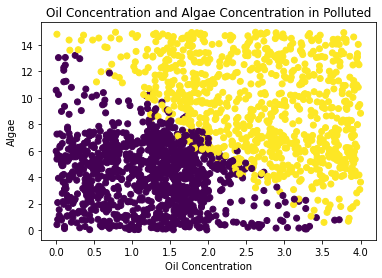

In [ ]:
# Visualization

plt.scatter(prediction2['Oil Concentration'], prediction2['Algae Concentration'], c = prediction2['prediction'])
plt.title('Oil Concentration and Algae Concentration in Polluted')
plt.xlabel('Oil Concentration')
plt.ylabel('Algae')
plt.show

# Visualization

In [ ]:
data = spark.createDataFrame([
    {'Category': 'Dairy', 'Products_count': 420},
    {'Category': 'Frozen Foods', 'Products_count': 250},
    {'Category': 'Meat', 'Products_count': 650},
    {'Category': 'Beverages', 'Products_count': 500},
    {'Category': 'Others', 'Products_count': 100}
])

data = data.toPandas()

data['Category']

/usr/lib/spark-2.4.7-bin-hadoop2.7/python/pyspark/sql/session.py:346: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


0           Dairy
1    Frozen Foods
2            Meat
3       Beverages
4          Others
Name: Category, dtype: object

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


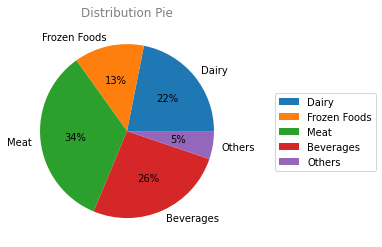

In [ ]:
plot = plt.pie(data['Products_count'], labels=data['Category'], autopct='%.f%%')
plt.legend(plot[0], labels=data['Category'], bbox_to_anchor=(1.1,0.5), bbox_transform=plt.gcf().transFigure, loc='center right')
plt.title('Distribution Pie', color='gray')
plt.show()

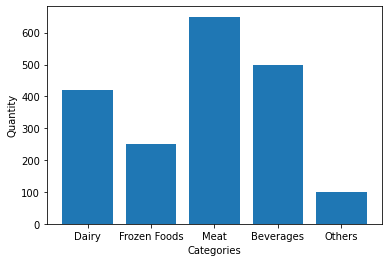

In [ ]:
plt.bar(data['Category'], data['Products_count'])
plt.xlabel('Categories')
plt.ylabel('Quantity')
plt.show()

In [ ]:
data2 = spark.createDataFrame([
    {'hours': 8,  'grade': 90},
    {'hours': 5,  'grade': 80},
    {'hours': 4,  'grade': 60},
    {'hours': 4,  'grade': 50},
    {'hours': 3,  'grade': 40},
    {'hours': 6,  'grade': 87},
    {'hours': 7,  'grade': 92},
    {'hours': 2,  'grade': 35}
])

data2 = data2.toPandas()

/usr/lib/spark-2.4.7-bin-hadoop2.7/python/pyspark/sql/session.py:346: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


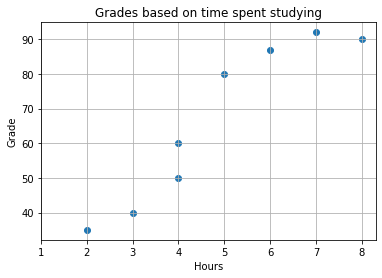

In [ ]:
plt.scatter(data2['hours'], data2['grade'])
plt.title('Grades based on time spent studying')

plt.xticks(range(1, len(data2['hours'])+1))
plt.xlabel('Hours')
plt.ylabel('Grade')
plt.grid()
plt.show()

In [ ]:
data3 = spark.createDataFrame([
    {'month': 1,  'profit': 4500000},
    {'month': 2,  'profit': 3500000},
    {'month': 3,  'profit': 4000000},
    {'month': 4,  'profit': 4200000},
    {'month': 5,  'profit': 4700000},
    {'month': 6,  'profit': 5500000},
    {'month': 7,  'profit': 4800000},
    {'month': 8,  'profit': 5200000},
    {'month': 9,  'profit': 6080000},
    {'month': 10,  'profit': 5500000},
    {'month': 11,  'profit': 5800000},
    {'month': 12,  'profit': 5900000},
])

data3 = data3.toPandas()

/usr/lib/spark-2.4.7-bin-hadoop2.7/python/pyspark/sql/session.py:346: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


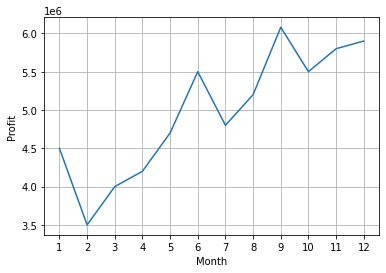

In [ ]:
plt.plot(data3['profit'])
plt.xticks(range(len(data3['month'])), data3['month']) 
plt.xlabel('Month')
plt.ylabel('Profit')
plt.grid()
plt.show()